In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Loading the dataset
df = pd.read_csv('fraud_oracle.csv')

# Data Cleaning
df = df.drop_duplicates() # remove duplicates
df = df.dropna() # remove rows with missing values

# Data Transformation
le = LabelEncoder()
cols_to_encode = ['Make', 'AccidentArea', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'AddressChange_Claim', 'BasePolicy']
df[cols_to_encode] = df[cols_to_encode].apply(le.fit_transform)



In [3]:
# Declaring Function Convert to float 
def convert_to_float(val):
    if isinstance(val, int):
        return float(val)
    elif isinstance(val, float):
        return val
    elif 'more than' in val:
        return float(re.findall(r'\d+', val)[0])
    elif 'to' in val:
        return sum(map(float, re.findall(r'\d+', val))) / 2
    elif 'years' in val:
        return float(re.findall(r'\d+', val)[0])
    else:
        return None

# Replace 'more than 30' with 31 in the 'Age' column
cols_to_convert = ['Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'NumberOfSuppliments', 'NumberOfCars', 'VehiclePrice']
df[cols_to_convert] = df[cols_to_convert].apply(lambda col: col.apply(convert_to_float))
df['Age'] = df['Age'].astype(float)

# Standardize numerical features
scaler = StandardScaler()
cols_to_scale = ['Age', 'Deductible', 'DriverRating', 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'NumberOfSuppliments', 'NumberOfCars']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])



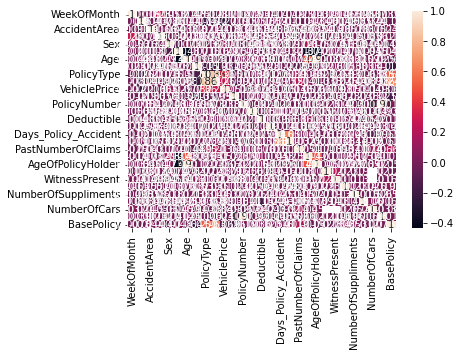

In [4]:
# Exploratory Data Analysis
sns.histplot(df['FraudFound_P'])

# creating a correlation matrix
corr = df.corr()

# visual representation of the correlation matrix
sns.heatmap(corr, annot=True)

# Feature Engineering
df['TotalNumberOfClaims'] = df['PastNumberOfClaims'] + df['Days_Policy_Accident']
df['PolicyAge'] = 2023 - df['Year']




In [5]:
# Model Building
X = df.drop(['FraudFound_P', 'PolicyNumber','Month','DayOfWeek','DayOfWeekClaimed','MonthClaimed'], axis=1)
y = df['FraudFound_P']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fill in missing values with mean
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)



In [6]:
# AdaBoost Classifier


# Train AdaBoostClassifier model
abc = AdaBoostClassifier()
abc.fit(X_train, y_train)

# Make predictions on test set
y_pred_abc = abc.predict(X_test)

# Evaluate model performance

accuracy_abc = accuracy_score(y_test, y_pred_abc)
precision_abc = precision_score(y_test, y_pred_abc)
recall_abc = recall_score(y_test, y_pred_abc)
f1_abc = f1_score(y_test, y_pred_abc)
confusion_abc = confusion_matrix(y_test, y_pred_abc)

print('Accuracy:', accuracy_abc*100)
print('Precision:', precision_abc*100)
print('Recall:', recall_abc*100)
print('F1 score:', f1_abc*100)
print('Confusion matrix:')
print(confusion_abc)



Accuracy: 93.15823605706875
Precision: 20.833333333333336
Recall: 2.5380710659898478
F1 score: 4.524886877828054
Confusion matrix:
[[2868   19]
 [ 192    5]]


In [7]:
# Random Forest Classifier


# Train Random Forest model
rf_model = RandomForestClassifier(random_state=45)
rf_model.fit(X_train, y_train)

# Make predictions on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate model performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
confusion_rf = confusion_matrix(y_test, y_pred_rf)

print('Random Forest Classifier:')
print('Accuracy:', accuracy_rf*100)
print('Precision:', precision_rf*100)
print('Recall:', recall_rf*100)
print('F1 score:', f1_rf*100)
print('Confusion matrix:')
print(confusion_rf)



Random Forest Classifier:
Accuracy: 93.7094682230869
Precision: 100.0
Recall: 1.5228426395939088
F1 score: 3.0000000000000004
Confusion matrix:
[[2887    0]
 [ 194    3]]


In [8]:
# Decision Tree Classifier


# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate model performance
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
confusion_dt = confusion_matrix(y_test, y_pred_dt)

print('Decision Tree Classifier:')
print('Accuracy:', accuracy_dt*100)
print('Precision:', precision_dt*100)
print('Recall:', recall_dt*100)
print('F1 score:', f1_dt*100)
print('Confusion matrix:')
print(confusion_dt)



Decision Tree Classifier:
Accuracy: 88.61867704280155
Precision: 16.810344827586206
Recall: 19.796954314720814
F1 score: 18.181818181818183
Confusion matrix:
[[2694  193]
 [ 158   39]]
